In [1]:
from ml_lab.models.form_4138_decision_tree import Form4138DecisionTree
from ml_lab.models.form_4138_nn import Form4138NN
from ml_lab.utils.load_data import load_y_truth_y_pedictions
from ml_lab.utils.eval_model import eval_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [2]:
# change dir of jupyter notebook session so it can access relative files
import os
from dotenv import load_dotenv
load_dotenv()

root_dir = os.getenv("ROOT_DIR")
os.chdir(root_dir)

## Eval Decision Tree Model

In [3]:
model = Form4138DecisionTree()
eval_model(model)

Loading y_truth, y_predictions for train data...
Loaded y_truth, y_predictions for 2040 train cases
Loading y_truth, y_predictions for test data...
Loaded y_truth, y_predictions for 406 test cases


,data,accuracy,precision,recall,f1
0,train,0.9980,0.9980,0.9980,0.9980
1,test,0.8276,0.8324,0.8276,0.8283


#### Create a quick confusion matrix with sklearn ConfusionMatrixDisplay.from_predictions

In [4]:
y_truth, y_predictions = load_y_truth_y_pedictions(model, "test")

Loading y_truth, y_predictions for test data...
Loaded y_truth, y_predictions for 406 test cases


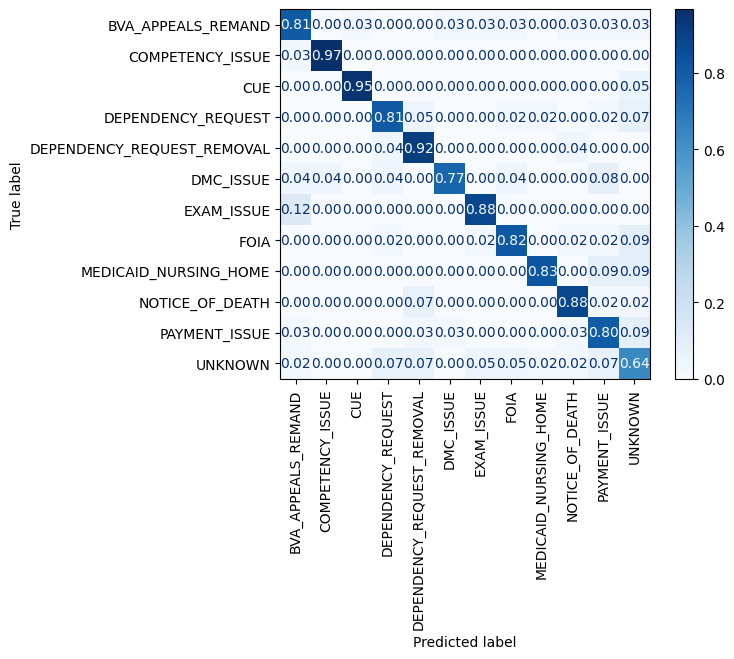

In [5]:
disp = ConfusionMatrixDisplay.from_predictions(y_truth, y_predictions, normalize="true", xticks_rotation="vertical", values_format=".2f", cmap="Blues")


#### Create a nicely formatted confusion matrix with Seaborn

In [6]:
def create_sns_confusion_matrix(y_truth, y_predictions):
    cm = confusion_matrix(y_truth, y_predictions, normalize="true", labels=model.labels)
    # print(cm)
    sns.set(font_scale=.8)
    plt = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f',linewidth=1)
    plt.set_xticklabels(model.labels, rotation="vertical")
    plt.set_yticklabels(model.labels, rotation="horizontal")
    plt.set_xlabel('Predicted Label')
    plt.set_ylabel('True Label')
    plt.set_title("Normalized Confusion Matrix", fontsize=16)

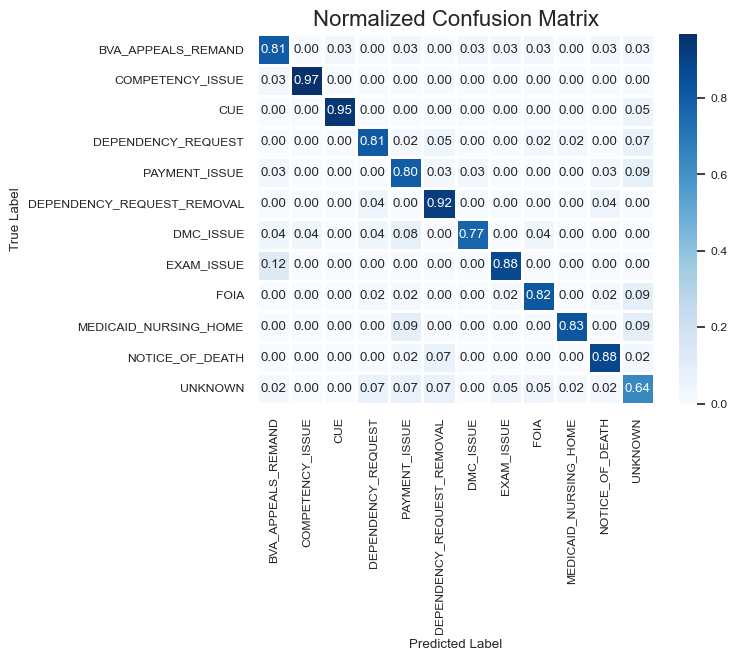

In [7]:
create_sns_confusion_matrix(y_truth, y_predictions)

## Eval Neural Net Model

In [8]:
model = Form4138NN()
eval_model(model)

Loading y_truth, y_predictions for train data...
Loaded y_truth, y_predictions for 2040 train cases
Loading y_truth, y_predictions for test data...
Loaded y_truth, y_predictions for 406 test cases


,data,accuracy,precision,recall,f1
0,train,0.9662,0.9665,0.9662,0.9661
1,test,0.8695,0.8720,0.8695,0.8687


Loading y_truth, y_predictions for test data...
Loaded y_truth, y_predictions for 406 test cases


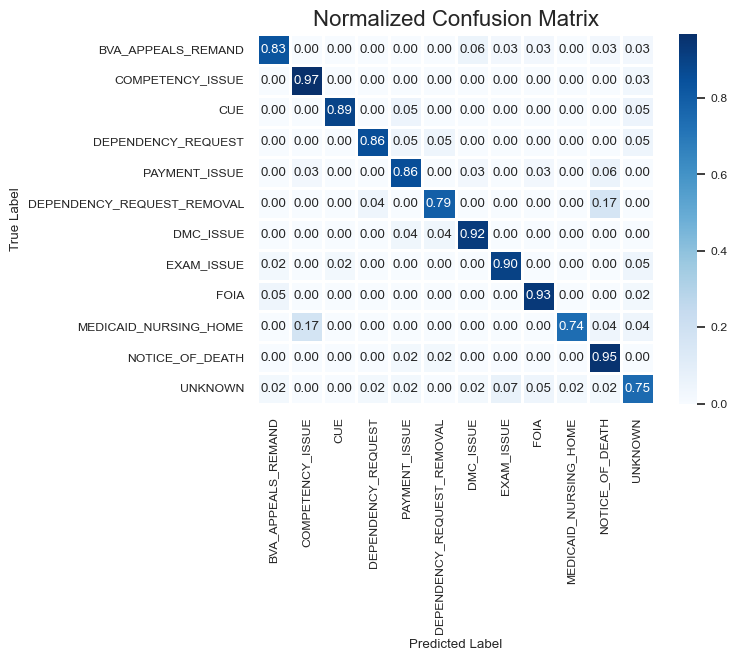

In [9]:
y_truth, y_predictions = load_y_truth_y_pedictions(model, "test")
create_sns_confusion_matrix(y_truth, y_predictions)